### Importação dos dados



In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

dados_completo = pd.concat([loja, loja2, loja3, loja4])
dados_completo.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [4]:
faturamento_por_loja = dados_completo.groupby('Loja')['Preço'].sum()

In [5]:
(faturamento_por_loja.to_frame('Faturamento')
 .style
 .format('R${:,.2f}')
 .set_caption('Faturamento Total por Loja'))

,Faturamento
Loja,
Loja 1,"R$1,534,509.12"
Loja 2,"R$1,488,459.06"
Loja 3,"R$1,464,025.03"
Loja 4,"R$1,384,497.58"


# 2. Vendas por Categoria


In [22]:
vendas_por_categoria = dados_completo.groupby(['Loja', 'Categoria do Produto']).size().unstack()
vendas_por_categoria = vendas_por_categoria[vendas_por_categoria.sum().sort_values(ascending=False).index]

In [23]:
(vendas_por_categoria.T
 .style
 .set_caption('Vendas por Loja (Ordenadas por Categoria)')
)

Loja,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


# 3. Média de Avaliação das Lojas

In [8]:
dados_completo['Avaliação da compra'] = dados_completo['Avaliação da compra'].clip(0, 5)
media_avaliacao = dados_completo.groupby('Loja')['Avaliação da compra'].mean()

In [9]:
(media_avaliacao.to_frame('Avaliação da Loja')
 .style
 .format('{:,.2f}')
 .set_caption('Média de avaliação por loja'))

,Avaliação da Loja
Loja,
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


# 4. Produtos Mais e Menos Vendidos

In [10]:
def top_produtos(loja, n=5):
    return (
        dados_completo[dados_completo['Loja'] == loja]['Produto']
        .value_counts()
        .head(n)
        .to_frame('Qtd Vendida')
        .style
        .set_caption(f'{loja} - Top {n} Produtos Mais Vendidos')
    )

def bottom_produtos(loja, n=5):
    return (
        dados_completo[dados_completo['Loja'] == loja]['Produto']
        .value_counts()
        .tail(n)
        .to_frame('Qtd Vendida')
        .style
        .set_caption(f'{loja} - {n} Produtos Menos Vendidos')
        .format('{:,}')
    )

In [11]:
for loja in sorted(dados_completo['Loja'].unique()):
    display(top_produtos(loja))
    display(bottom_produtos(loja))
    print("\n" + "="*50 + "\n")

,Qtd Vendida
Produto,
Micro-ondas,60
TV Led UHD 4K,60
Guarda roupas,60
Secadora de roupas,58
Cômoda,56


,Qtd Vendida
Produto,
Ciência de dados com python,39
Pandeiro,36
Panela de pressão,35
Headset,33
Celular ABXY,33


,Qtd Vendida
Produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61
Violão,58
Pandeiro,58


,Qtd Vendida
Produto,
Fone de ouvido,37
Poltrona,35
Mesa de jantar,34
Impressora,34
Jogo de tabuleiro,32


,Qtd Vendida
Produto,
Kit banquetas,57
Mesa de jantar,56
Cama king,56
Jogo de panelas,55
Cômoda,55


,Qtd Vendida
Produto,
Guitarra,38
Jogo de copos,36
Mochila,36
Micro-ondas,36
Blocos de montar,35


,Qtd Vendida
Produto,
Cama box,62
Faqueiro,59
Dashboards com Power BI,56
Cama king,56
Carrinho controle remoto,55


,Qtd Vendida
Produto,
Geladeira,38
Ciência de dados com python,38
Violão,37
Guarda roupas,34
Guitarra,33


# 5. Frete Médio por Loja


In [12]:
frete_medio = dados_completo.groupby('Loja')['Frete'].mean()

In [13]:
(frete_medio.to_frame('Frete Médio')
 .style
 .format('R${:,.2f}')
 .set_caption('Frete Médio por Loja'))

,Frete Médio
Loja,
Loja 1,R$34.69
Loja 2,R$33.62
Loja 3,R$33.07
Loja 4,R$31.28


# Graficos

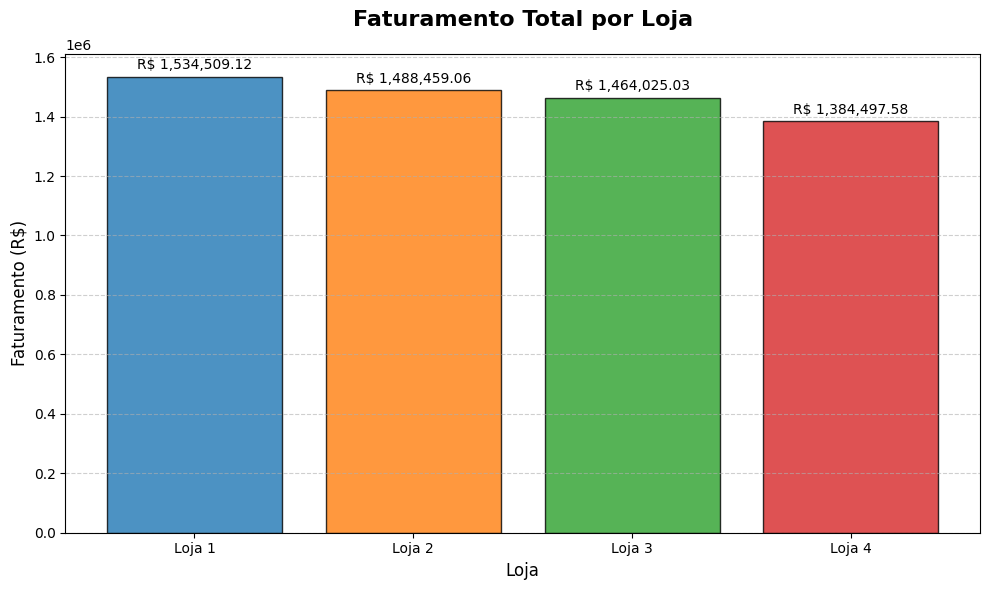

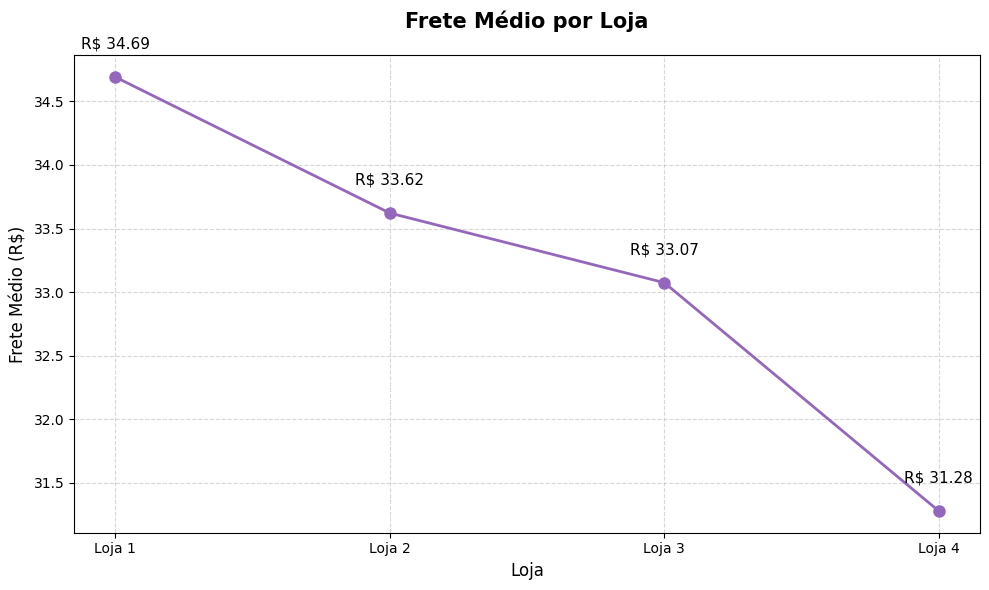

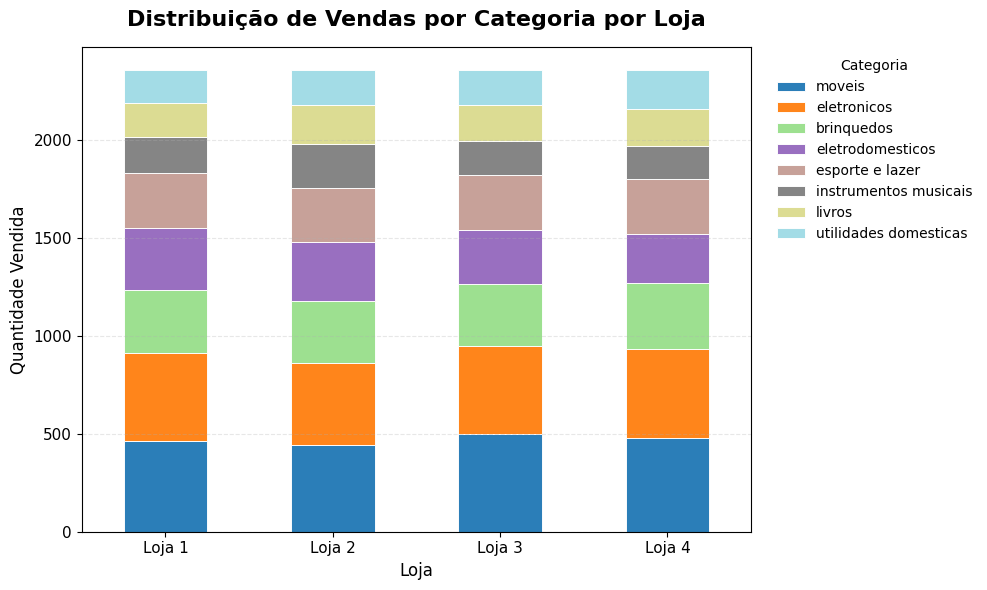

In [24]:
plt.figure(figsize=(10, 6))
bars = plt.bar(
    faturamento_por_loja.index,
    faturamento_por_loja.values,
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
    edgecolor='black',
    alpha=0.8
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height * 1.01,
        f'R$ {height:,.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Faturamento Total por Loja', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print("\n" + "="*150 + "\n")

# Grafico de linhas
plt.figure(figsize=(10, 6))
plt.plot(
    frete_medio.index,
    frete_medio.values,
    marker='o',
    markersize=8,
    linewidth=2,
    color='#9467bd'
)

for x, y in zip(frete_medio.index, frete_medio.values):
    plt.text(x, y + 0.2, f'R$ {y:.2f}', ha='center', va='bottom', fontsize=11)

plt.title('Frete Médio por Loja', fontsize=15, pad=20, fontweight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("\n" + "="*150 + "\n")

# Gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))

vendas_por_categoria.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='tab20',
    edgecolor='white',
    linewidth=0.7,
    alpha=0.95
)

ax.set_title('Distribuição de Vendas por Categoria por Loja', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Loja', fontsize=12)
ax.set_ylabel('Quantidade Vendida', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Categoria', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Relatório

## **Objetivo**

Este relatório tem como objetivo analisar o desempenho de quatro lojas da Alura Store e, com base nos dados de vendas, avaliação e faturamento, recomendar qual loja apresenta os piores resultados e, portanto, deveria ser vendida.

---

## Análises Realizadas

### 1. Faturamento Total por Loja

A loja com maior faturamento foi a **Loja 1**, seguida pela Loja 2 e Loja 3. A **Loja 4 apresentou o menor faturamento** entre todas.

- **Loja 1**: R$ 1.534.509,12

- **Loja 2**: R$ 1.488.459,06

- **Loja 3**: R$ 1.464.025,03

- **Loja 4**: R$ 1.384.497,58


### 2. Vendas por Categoria

As lojas variam em desempenho conforme a categoria de produto. No geral:

- Loja 1 e Loja 2 vendem mais em categorias populares como "Móveis" e "Eletrônicos".
- A **Loja 4 possui um volume muito menor em quase todas as categorias**, indicando baixa demanda.

### 3. Média de Avaliação das Lojas

As avaliações médias das lojas mostram:

- Loja 2 e Loja 3 possuem boas avaliações (acima de 4.0).
- **Loja 4 apresenta a menor média de avaliação**, indicando menor satisfação dos clientes.

### 4. Produtos Mais e Menos Vendidos

- As lojas 1, 2 e 3 têm produtos com vendas mais consistentes.
- A Loja 4 tem **poucos produtos** com bom desempenho.

---

## Conclusão: Qual Loja Deve Ser Vendida?

Após a análise dos dados, é recomendado que a **Loja 4 seja vendida**.

### Justificativas:
- Menor faturamento total.
- Pior desempenho nas categorias de produtos.
- Média de avaliação inferior.
- Produtos com baixa rotatividade.

A manutenção da Loja 4 pode estar gerando custos desnecessários e prejudicando a imagem da marca, além de não apresentar bom retorno financeiro.

## Recomendações Finais

1. Considerar o fechamento ou venda da Loja 4.
2. Realocar investimentos para as lojas com melhor desempenho.
3. Investir em logística e promoções nas lojas restantes para ampliar a margem de lucro.